Fuente: https://www.kaggle.com/teampycaret/mobile-price-prediction-multiclass-using-pycaret

## **Contexto del Problema**

Bob ha iniciado su propia empresa de telefonía móvil. Quiere dar una dura batalla a las grandes empresas como Apple, Samsung, etc.

No sabe cómo estimar el precio de los móviles que crea su empresa. En este competitivo mercado de la telefonía móvil, no se pueden simplemente asumir cosas. Para solucionar este problema, recopila datos de ventas de teléfonos móviles de varias empresas.

Bob quiere averiguar alguna relación entre las características de un teléfono móvil (por ejemplo: - RAM, memoria interna, etc.) y su precio de venta. Pero no es tan bueno en Machine Learning. Entonces necesita tu ayuda para resolver este problema.

En este problema, no tiene que predecir el precio real, sino un rango de precios que indica qué tan alto es el precio.
Nota: Si se buscara predecir el precio exacto sería un problema de regresión

# Carga del dataset

In [4]:
import pandas as pd
train = pd.read_csv('data/train.csv')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Instalación de PyCaret

In [5]:
!pip install pycaret

Processing c:\users\leyre\appdata\local\pip\cache\wheels\b9\ba\77\163f10f14bd489351530603e750c195b0ceceed2f3be2b32f1\sqlalchemy-1.3.13-cp37-cp37m-win_amd64.whl


# Inicilización del Entorno

In [6]:
from pycaret.classification import *
clf1 = setup(data = train, target = 'price_range', session_id = 786, silent = True)

#silent is True to perform unattended run when kernel is executed.

Setup Succesfully Completed!


,Description,Value
0,session_id,786
1,Target Type,Multiclass
2,Label Encoded,"0: 0, 1: 1, 2: 2, 3: 3"
3,Original Data,"(2000, 21)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,11
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# Comparación de Modelos

In [7]:
%%time
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.9349,0.0000,0.9349,0.9361,0.9350,0.9132,0.9136,4.6702
1,K Neighbors Classifier,0.9185,0.0000,0.9185,0.9201,0.9183,0.8913,0.8920,0.0245
2,Linear Discriminant Analysis,0.9085,0.0000,0.9085,0.9126,0.9092,0.8780,0.8789,0.0266
3,Light Gradient Boosting Machine,0.9056,0.0000,0.9056,0.9073,0.9054,0.8742,0.8748,0.7394
4,Gradient Boosting Classifier,0.8956,0.0000,0.8956,0.8969,0.8956,0.8608,0.8612,1.8269
5,Extreme Gradient Boosting,0.8949,0.0000,0.8949,0.8965,0.8945,0.8599,0.8606,0.6287
6,Decision Tree Classifier,0.8206,0.0000,0.8205,0.8257,0.8216,0.7607,0.7617,0.0152
7,Extra Trees Classifier,0.7763,0.0000,0.7762,0.7763,0.7738,0.7017,0.7031,0.2643
8,Random Forest Classifier,0.6826,0.0000,0.6825,0.6851,0.6804,0.5768,0.5789,0.1193
9,Logistic Regression,0.6283,0.0000,0.6282,0.6269,0.6247,0.5044,0.5059,0.1015


Wall time: 2min 30s


# Creación del modelo

In [8]:
# create knn model
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8929,0.0000,0.8929,0.8932,0.8924,0.8571,0.8576
1,0.9357,0.0000,0.9357,0.9371,0.9353,0.9143,0.9150
2,0.9429,0.0000,0.9429,0.9437,0.9432,0.9238,0.9239
3,0.8857,0.0000,0.8857,0.8953,0.8865,0.8476,0.8505
4,0.9500,0.0000,0.9500,0.9504,0.9495,0.9333,0.9338
5,0.9643,0.0000,0.9643,0.9653,0.9639,0.9524,0.9530
6,0.8857,0.0000,0.8857,0.8891,0.8865,0.8476,0.8482
7,0.9286,0.0000,0.9286,0.9289,0.9283,0.9048,0.9050
8,0.8929,0.0000,0.8929,0.8919,0.8917,0.8571,0.8576
9,0.9065,0.0000,0.9061,0.9066,0.9059,0.8753,0.8757


In [9]:
# create catboost model
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9143,0.0000,0.9143,0.9151,0.9136,0.8857,0.8864
1,0.9571,0.0000,0.9571,0.9573,0.9571,0.9429,0.9429
2,0.9429,0.0000,0.9429,0.9445,0.9430,0.9238,0.9242
3,0.9286,0.0000,0.9286,0.9303,0.9289,0.9048,0.9051
4,0.9786,0.0000,0.9786,0.9786,0.9785,0.9714,0.9715
5,0.9500,0.0000,0.9500,0.9509,0.9502,0.9333,0.9335
6,0.9357,0.0000,0.9357,0.9361,0.9358,0.9143,0.9143
7,0.9214,0.0000,0.9214,0.9229,0.9217,0.8952,0.8955
8,0.9071,0.0000,0.9071,0.9071,0.9070,0.8762,0.8763
9,0.9137,0.0000,0.9132,0.9179,0.9142,0.8849,0.8860


In [15]:
# create lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.0000,0.8571,0.8583,0.8568,0.8095,0.8101
1,0.9500,0.0000,0.9500,0.9503,0.9497,0.9333,0.9337
2,0.9143,0.0000,0.9143,0.9146,0.9143,0.8857,0.8858
3,0.9286,0.0000,0.9286,0.9310,0.9288,0.9048,0.9054
4,0.9571,0.0000,0.9571,0.9592,0.9571,0.9429,0.9436
5,0.8714,0.0000,0.8714,0.8731,0.8699,0.8286,0.8300
6,0.8786,0.0000,0.8786,0.8818,0.8794,0.8381,0.8386
7,0.9000,0.0000,0.9000,0.9029,0.9005,0.8667,0.8673
8,0.9071,0.0000,0.9071,0.9061,0.9062,0.8762,0.8765
9,0.8921,0.0000,0.8914,0.8954,0.8917,0.8561,0.8573


# Optimización del modelo

In [11]:
# tune knn model
tuned_knn = tune_model(knn, optimize = 'Accuracy', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9214,0.0000,0.9214,0.9241,0.9206,0.8952,0.8966
1,0.9500,0.0000,0.9500,0.9497,0.9494,0.9333,0.9337
2,0.9357,0.0000,0.9357,0.9372,0.9362,0.9143,0.9145
3,0.9286,0.0000,0.9286,0.9326,0.9290,0.9048,0.9059
4,0.9571,0.0000,0.9571,0.9587,0.9566,0.9429,0.9437
5,0.9357,0.0000,0.9357,0.9364,0.9356,0.9143,0.9146
6,0.9286,0.0000,0.9286,0.9287,0.9286,0.9048,0.9048
7,0.9357,0.0000,0.9357,0.9369,0.9360,0.9143,0.9145
8,0.9286,0.0000,0.9286,0.9283,0.9284,0.9048,0.9048
9,0.8921,0.0000,0.8916,0.8934,0.8919,0.8561,0.8566


In [12]:
# parameters of tuned_knn
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=35, p=2,
                     weights='distance')


In [13]:
tuned_catboost = tune_model(catboost, optimize = 'Accuracy', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9214,0.0000,0.9214,0.9224,0.9209,0.8952,0.8959
1,0.9500,0.0000,0.9500,0.9507,0.9499,0.9333,0.9337
2,0.9500,0.0000,0.9500,0.9504,0.9501,0.9333,0.9334
3,0.9214,0.0000,0.9214,0.9253,0.9219,0.8952,0.8963
4,0.9643,0.0000,0.9643,0.9650,0.9639,0.9524,0.9528
5,0.9500,0.0000,0.9500,0.9523,0.9505,0.9333,0.9338
6,0.9357,0.0000,0.9357,0.9372,0.9360,0.9143,0.9146
7,0.9214,0.0000,0.9214,0.9235,0.9220,0.8952,0.8955
8,0.9071,0.0000,0.9071,0.9058,0.9058,0.8762,0.8766
9,0.9065,0.0000,0.9061,0.9106,0.9071,0.8753,0.8763


In [16]:
tuned_lightgbm = tune_model(lightgbm, optimize = 'Accuracy', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8643,0.0000,0.8643,0.8680,0.8636,0.8190,0.8207
1,0.9500,0.0000,0.9500,0.9507,0.9499,0.9333,0.9337
2,0.9286,0.0000,0.9286,0.9280,0.9279,0.9048,0.9050
3,0.9071,0.0000,0.9071,0.9104,0.9076,0.8762,0.8770
4,0.9429,0.0000,0.9429,0.9435,0.9426,0.9238,0.9242
5,0.8786,0.0000,0.8786,0.8770,0.8772,0.8381,0.8385
6,0.9071,0.0000,0.9071,0.9077,0.9073,0.8762,0.8763
7,0.8714,0.0000,0.8714,0.8749,0.8725,0.8286,0.8290
8,0.8929,0.0000,0.8929,0.8947,0.8909,0.8571,0.8591
9,0.8849,0.0000,0.8840,0.8923,0.8846,0.8465,0.8491


# Visualización de los resultados

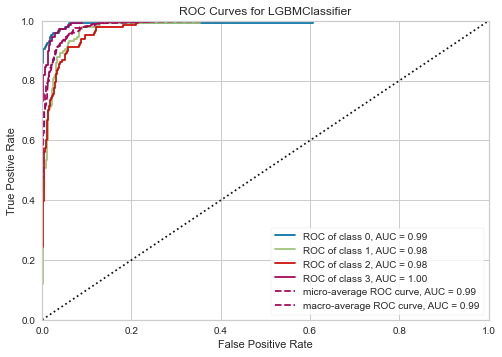

In [17]:
# auc
plot_model(lightgbm)

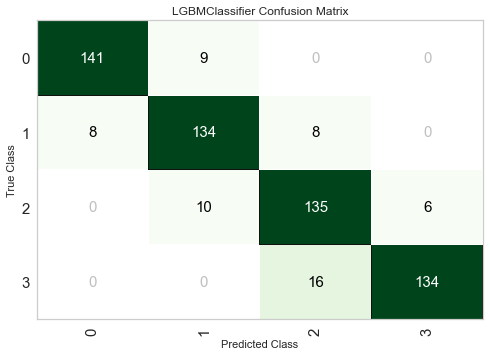

In [18]:
# confusion matrix
plot_model(lightgbm, plot = 'confusion_matrix')

# Finalización del modelo

In [19]:
final_dt = finalize_model(lightgbm)

# Predicciones con datos de Test

In [20]:
test = pd.read_csv('data/test.csv')
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [21]:
predictions = predict_model(final_dt, data=test)

In [22]:
predictions.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Label,Score
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,1412,3476,12,7,2,0,1,0,3,0.9702
1,2,841,1,0.5,1,4,1,61,0.8,191,...,857,3895,6,0,7,1,0,0,3,0.9976
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1366,2396,17,10,10,0,1,1,3,0.8919
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,1752,3893,10,0,7,1,1,0,3,0.9998
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,810,1773,15,8,7,1,0,1,1,0.9972
